<a href="https://colab.research.google.com/github/poltorashka22/Data-analysis/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Среднее потребление по всем странам за последние 5 лет:
  2017: 104.68 млрд кВт*ч
  2018: 108.44 млрд кВт*ч
  2019: 110.21 млрд кВт*ч
  2020: 110.41 млрд кВт*ч
  2021: 116.76 млрд кВт*ч

Среднее производство по всем странам за последние 5 лет:
  2017: 115.89 млрд кВт*ч
  2018: 119.77 млрд кВт*ч
  2019: 121.50 млрд кВт*ч
  2020: 121.49 млрд кВт*ч
  2021: 128.11 млрд кВт*ч
Размер массива total_consumption_by_year: (30,)
Годы: 1992..2021 (30 лет)

Полный массив суммарного потребления по годам:
  1992: 10569.02
  1993: 10854.56
  1994: 11104.65
  1995: 11476.48
  1996: 11805.87
  1997: 12122.03
  1998: 12419.81
  1999: 12685.75
  2000: 13230.25
  2001: 13486.49
  2002: 13938.78
  2003: 14455.56
  2004: 15128.10
  2005: 15725.98
  2006: 16438.21
  2007: 17205.12
  2008: 17477.47
  2009: 17435.69
  2010: 18748.16
  2011: 19438.82
  2012: 19918.25
  2013: 20573.10
  2014: 20981.24
  2015: 21400.02
  2016: 22022.69
  2017: 22716.21
  2018: 23530.92
  2019: 23915.66
  2020: 23959.68
  2021: 253

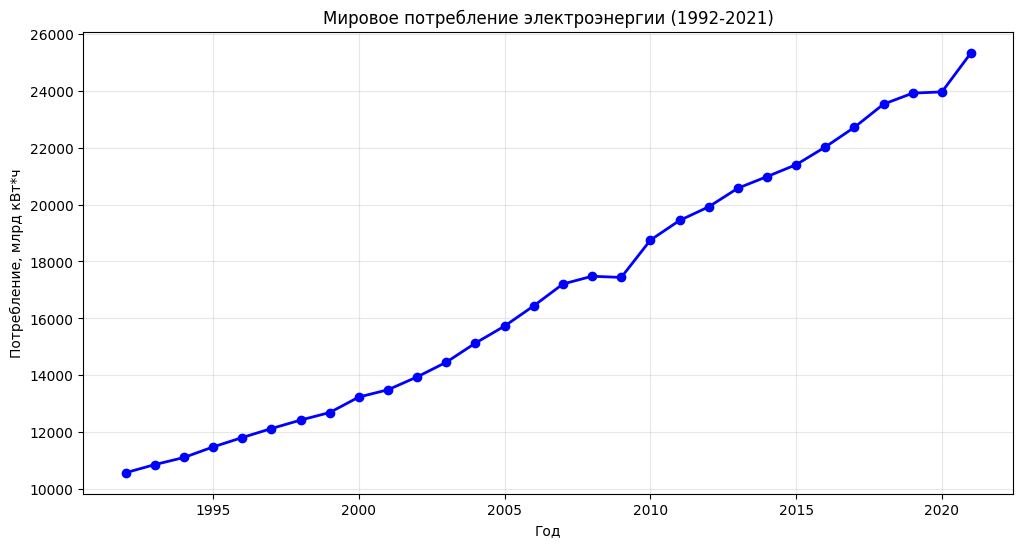

Максимальное производство одной страны за один год: 8151.52 млрд кВт*ч
  Страна: China, Год: 2021, Производство: 8151.52 млрд кВт*ч

Отсортировано по убыванию производства:
  China: 7190.02 млрд кВт*ч
  United States: 4130.27 млрд кВт*ч
  India: 1595.25 млрд кВт*ч
  Russia: 1059.99 млрд кВт*ч
  Japan: 983.88 млрд кВт*ч
  Canada: 631.61 млрд кВт*ч
  Brazil: 614.18 млрд кВт*ч
  Germany: 581.56 млрд кВт*ч
  South Korea: 558.36 млрд кВт*ч
  France: 533.22 млрд кВт*ч
10% СТРАН С НАИБОЛЬШИМ ПОТРЕБЛЕНИЕМ В СРЕДНЕМ ЗА ПОСЛЕДНИЕ 5 ЛЕТ
Пороговое значение: 198.31 млрд. кВт*ч
Количество стран в топ-10%: 22

Страна               | Потребление (млрд. кВт*ч)
------------------------------------------------
South Africa         |                    200.65
Russia               |                    946.68
France               |                    445.22
Germany              |                    520.23
Italy                |                    296.44
Spain                |                    240.37
Turki

/tmp/ipython-input-2804606552.py:116: RuntimeWarning: Mean of empty slice
  mean_generation_per_country_last_5 = np.nanmean(generation_last_5, axis=1)  # axis=1 → по годам


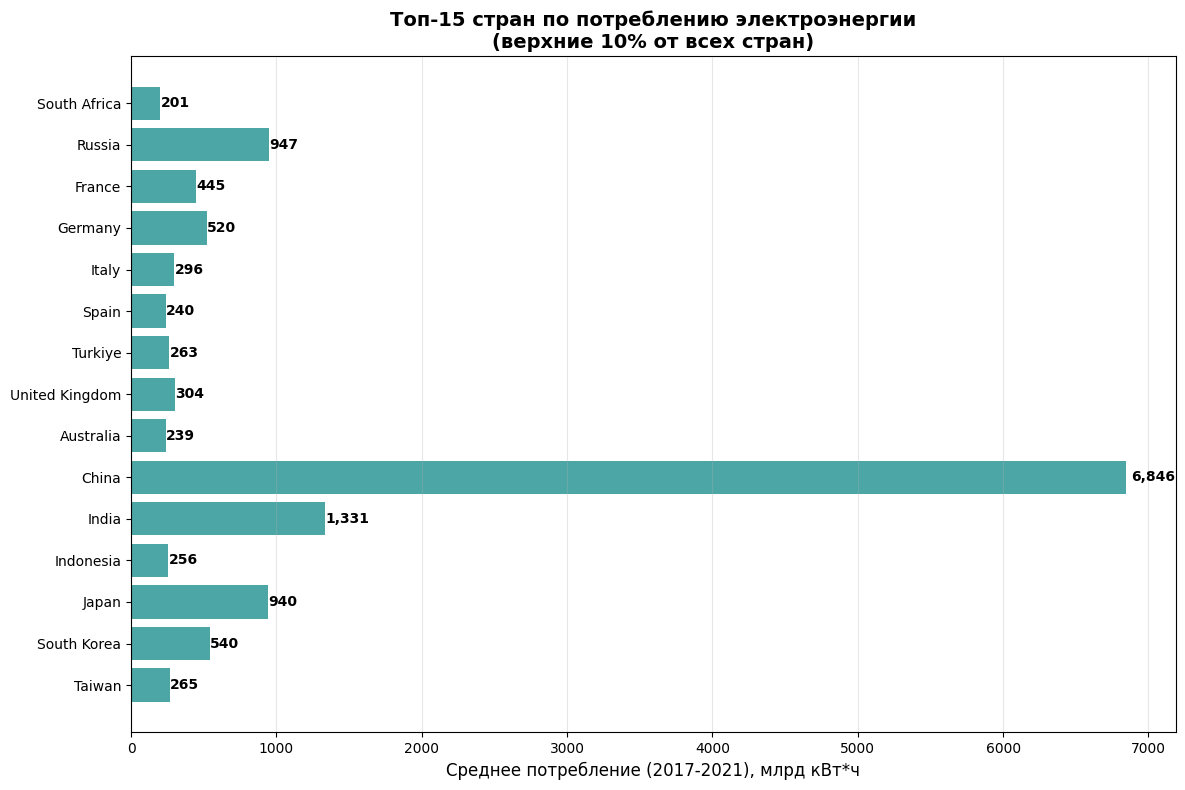

Найдено стран: 14

Страна          | Рост (раз) | Производство 1992 | Производство 2021
----------------------------------------------------------------------
Equatorial Guinea |    78.78   |            0.02   |            1.42
Cambodia        |    52.37   |            0.17   |            8.69
Mozambique      |    48.79   |            0.41   |           19.91
Laos            |    44.51   |            0.90   |           39.97
Vietnam         |    25.85   |            9.43   |          243.77
Maldives        |    23.64   |            0.03   |            0.66
Mauritania      |    13.50   |            0.14   |            1.88
Angola          |    12.81   |            1.28   |           16.43
Mali            |    12.50   |            0.27   |            3.39
Ethiopia        |    12.02   |            1.22   |           14.68
China           |    11.38   |          716.04   |         8151.52
Benin           |    10.48   |            0.02   |            0.24
Turks and Caicos Islands |    10.48

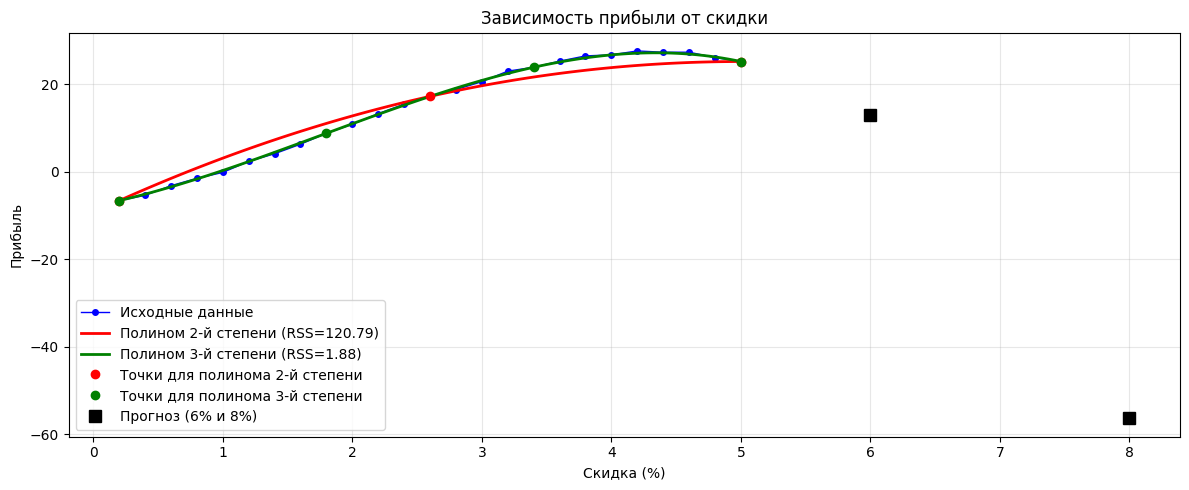

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

"""
ЗГРУЗКА ДАННЫХ
"""
#ПОТРЕБЛЕНИЕ
consumption_numeric = np.genfromtxt(
    'global-electricity-consumption.csv',
    delimiter=',',
    skip_header=1,
    usecols=range(1, 31),
    missing_values=['--', 'ie'],
    filling_values=np.nan
)

#СТРАНЫ
countries = np.genfromtxt(
    'global-electricity-consumption.csv',
    delimiter=',',
    skip_header=1,
    usecols=[0],
    dtype=str,
    encoding='utf-8'
)

#ПРОИЗВОДСТВА
generation_numeric = np.genfromtxt(
    'global-electricity-generation.csv',
    delimiter=',',
    skip_header=1,
    usecols=range(1, 31),
    missing_values=['--', 'ie'],
    filling_values=np.nan
)

years = np.arange(1992, 2022)

"""
СРЕДНЕЕ ПРОИЗВОДСТВО И ПОТРЕБЛЕНИЕ ЗА 5 ЛЕТ
"""
last_5_indices = [25, 26, 27, 28, 29]

# Выбираем данные за последние 5 лет
consumption_last_5 = consumption_numeric[:, last_5_indices]
generation_last_5 = generation_numeric[:, last_5_indices]

# Усредняем ПО ВСЕМ СТРАНАМ для каждого года
mean_consumption_by_year = np.nanmean(consumption_last_5, axis=0)
mean_generation_by_year = np.nanmean(generation_last_5, axis=0)

# Соответствующие годы
last_5_years = years[last_5_indices]

# Проверка
print("Среднее потребление по всем странам за последние 5 лет:")
for year, value in zip(last_5_years, mean_consumption_by_year):
    print(f"  {year}: {value:.2f} млрд кВт*ч")

print("\nСреднее производство по всем странам за последние 5 лет:")
for year, value in zip(last_5_years, mean_generation_by_year):
    print(f"  {year}: {value:.2f} млрд кВт*ч")


"""
СУММАРНОЕ ПОТРЕБЛЕНИЕ ЭНЕРГИИ ЗА КАЖДЫЙ ГОД
"""
# Суммируем потребление по всем странам для каждого года
total_consumption_by_year = np.nansum(consumption_numeric, axis=0)

# Проверяем размер
print(f"Размер массива total_consumption_by_year: {total_consumption_by_year.shape}")
print(f"Годы: 1992..2021 ({len(years)} лет)")

# Также можно вывести весь массив
print("\nПолный массив суммарного потребления по годам:")
for year, total in zip(years, total_consumption_by_year):
    print(f"  {year}: {total:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(years, total_consumption_by_year, marker='o', linewidth=2, color='blue')
plt.title('Мировое потребление электроэнергии (1992-2021)')
plt.xlabel('Год')
plt.ylabel('Потребление, млрд кВт*ч')
plt.grid(True, alpha=0.3)
plt.show()


"""
МАКС ПРОИЗВОДСТВО ОДНОЙ СТРАНОЙ ЗА ОДИН ГОД
"""

# 1. Находим максимальное производство
max_generation = np.nanmax(generation_numeric)
print(f"Максимальное производство одной страны за один год: {max_generation:.2f} млрд кВт*ч")

# 2. Находим индексы (страна, год), где достигнут этот максимум
# np.where возвращает кортеж индексов, где условие == True
max_indices = np.where(generation_numeric == max_generation)

# Индексы могут быть несколькими, если максимум достигнут в нескольких местах
for i in range(len(max_indices[0])):
    country_idx = max_indices[0][i]
    year_idx = max_indices[1][i]
    country = countries[country_idx]
    year = years[year_idx]
    print(f"  Страна: {country}, Год: {year}, Производство: {max_generation:.2f} млрд кВт*ч")


"""
СТРАНЫ С ПРОИЗВОДСТВОМ более 500 млрд. кВт*ч ЗА ПОСЛЕДНИЕ 5 ЛЕТ
"""

# Вычисляем среднее производство за последние 5 лет ДЛЯ КАЖДОЙ СТРАНЫ
mean_generation_per_country_last_5 = np.nanmean(generation_last_5, axis=1)

# Находим индексы стран, где среднее производство > 500
high_production_mask = mean_generation_per_country_last_5 > 500
high_production_indices = np.where(high_production_mask)[0]

# Получаем список названий этих стран
high_production_countries = countries[high_production_indices]
high_production_values = mean_generation_per_country_last_5[high_production_indices]

# Если хотим отсортировать по убыванию производства
print("\nОтсортировано по убыванию производства:")
sorted_indices = np.argsort(high_production_values)[::-1]
for idx in sorted_indices:
    print(f"  {high_production_countries[idx]}: {high_production_values[idx]:.2f} млрд кВт*ч")


"""
СТРАНЫ КОТОРЫЕ ПОТРЕБЛЯЮТ БОЛЬШЕ ВСЕГО ЗА ПОСЛЕДНИЕ 5 ЛЕТ
"""
# 1. Вычисляем среднее потребление за последние 5 лет для каждой страны
mean_consumption_per_country_last_5 = np.nanmean(consumption_last_5, axis=1)

# 2. Находим 90-ю перцентиль (порог для верхних 10% стран)
percentile_90 = np.nanpercentile(mean_consumption_per_country_last_5, 90)

# 3. Находим страны, чьё среднее потребление >= 90-й перцентили
top_10_percent_mask = mean_consumption_per_country_last_5 >= percentile_90
top_10_percent_indices = np.where(top_10_percent_mask)[0]

# 4. Получаем список стран и их значения
top_countries = countries[top_10_percent_indices]
top_values = mean_consumption_per_country_last_5[top_10_percent_indices]

# 5. Вывод в ТОЧНОМ формате как в примере
print("=" * 50)
print("10% СТРАН С НАИБОЛЬШИМ ПОТРЕБЛЕНИЕМ В СРЕДНЕМ ЗА ПОСЛЕДНИЕ 5 ЛЕТ")
print("=" * 50)
print(f"Пороговое значение: {percentile_90:.2f} млрд. кВт*ч")
print(f"Количество стран в топ-10%: {len(top_countries)}")
print()

print(f"{'Страна':<20} | {'Потребление (млрд. кВт*ч)':>25}")
print("-" * 48)

# Выводим все страны из топ-10%
for i, (country, value) in enumerate(zip(top_countries, top_values)):
    if i < 15:
        print(f"{country:<20} | {value:>25.2f}")

if len(top_countries) > 15:
    print(f"... и ещё {len(top_countries) - 15} стран")

print("=" * 50)

# Берем топ-15 стран для графика
n_show = min(15, len(top_countries))
top_countries_for_plot = top_countries[:n_show]
top_values_for_plot = top_values[:n_show]

plt.figure(figsize=(12, 8))
bars = plt.barh(top_countries_for_plot[::-1], top_values_for_plot[::-1], color='teal', alpha=0.7)
plt.xlabel('Среднее потребление (2017-2021), млрд кВт*ч', fontsize=12)
plt.title(f'Топ-{n_show} стран по потреблению электроэнергии\n(верхние 10% от всех стран)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, top_values_for_plot[::-1]):
    width = bar.get_width()
    plt.text(width + width*0.005, bar.get_y() + bar.get_height()/2,
             f'{value:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



"""
СТРАНЫ С РОСТОМ ПРОИЗВОДСТВА >10 РАЗ
"""

generation_1992 = generation_numeric[:, 0]
generation_2021 = generation_numeric[:, 29]

# Создаем маску для корректных данных
valid_mask = (~np.isnan(generation_1992)) & (~np.isnan(generation_2021)) & (generation_1992 > 0) & (generation_2021 > 0)

# Рассчитываем рост только для корректных данных
growth_ratio = np.full_like(generation_1992, np.nan, dtype=float)
growth_ratio[valid_mask] = generation_2021[valid_mask] / generation_1992[valid_mask]

# Находим страны с ростом > 10
high_growth_mask = (growth_ratio > 10) & (~np.isnan(growth_ratio))
high_growth_countries = countries[high_growth_mask]
growth_values = growth_ratio[high_growth_mask]

# Получаем соответствующие данные производства
prod_1992_values = generation_1992[high_growth_mask]
prod_2021_values = generation_2021[high_growth_mask]

if len(high_growth_countries) == 0:
    print("Нет стран, удовлетворяющих условию")
else:
    print(f"Найдено стран: {len(high_growth_countries)}")
    print("\nСтрана          | Рост (раз) | Производство 1992 | Производство 2021")
    print("-" * 70)

    # Сортируем по убыванию роста для лучшей читаемости
    sorted_indices = np.argsort(growth_values)[::-1]

    for idx in sorted_indices:
        country = high_growth_countries[idx]
        growth = growth_values[idx]
        prod_1992 = prod_1992_values[idx]
        prod_2021 = prod_2021_values[idx]
        print(f"{country:<15} | {growth:>8.2f}   | {prod_1992:>15.2f}   | {prod_2021:>15.2f}")


"""
СТРАНЫ ПОТРАТИВШИЕ БОЛЬШЕ 100 млрд. кВт*ч  ЗА ВСЕ ВРЕМЯ
"""

# Суммируем потребление и производство за все годы для каждой страны
total_consumption = np.nansum(consumption_numeric, axis=1)
total_generation = np.nansum(generation_numeric, axis=1)

# Находим страны, которые удовлетворяют условиям
condition_mask = (total_consumption > 100) & (total_generation < total_consumption)
deficit_countries = countries[condition_mask]
deficit_consumption = total_consumption[condition_mask]
deficit_generation = total_generation[condition_mask]

if len(deficit_countries) == 0:
    print("Нет стран, удовлетворяющих условию")
else:
    print(f"Найдено стран: {len(deficit_countries)}")
    print("\nСтрана          | Потребление (сумма) | Производство (сумма) | Дефицит")
    print("-" * 80)

    # Вычисляем дефицит для каждой страны
    deficits = deficit_consumption - deficit_generation

    # Сортируем по убыванию дефицита
    sorted_indices = np.argsort(deficits)[::-1]

    for idx in sorted_indices:
        country = deficit_countries[idx]
        cons = deficit_consumption[idx]
        gen = deficit_generation[idx]
        deficit = deficits[idx]
        print(f"{country:<15} | {cons:>18.2f} | {gen:>18.2f} | {deficit:>10.2f}")

"""
СТРАНА ПОТРАТИВШАЯ БОЛЬШЕ ВСЕХ В 2020
"""

# 2020 год - 29-й год в данных (1992=0, 1993=1, ..., 2020=28, 2021=29)
year_2020_index = 28
consumption_2020 = consumption_numeric[:, year_2020_index]

# Находим максимальное потребление в 2020 году
max_consumption_2020 = np.nanmax(consumption_2020)

# Находим индексы стран с максимальным потреблением
max_indices = np.where(consumption_2020 == max_consumption_2020)[0]

# Получаем названия стран
max_countries = countries[max_indices]
max_values = consumption_2020[max_indices]

print(f"Максимальное потребление в 2020 году: {max_consumption_2020:.2f} млрд кВт*ч")

if len(max_countries) == 1:
    print(f"Страна: {max_countries[0]}")
else:
    print(f"Страны с максимальным потреблением ({len(max_countries)}):")
    for country, value in zip(max_countries, max_values):
        print(f"  {country}: {value:.2f} млрд кВт*ч")



"""
ЗАДАНИЕ 2
"""
# 1. Загрузка данных из файла
data = np.genfromtxt('data2.csv', delimiter=';', skip_header=1)
discounts = data[:, 0]
profits = data[:, 1]

print(f"Загружено {len(discounts)} точек данных")
print(f"Диапазон скидок: {discounts[0]:.1f} - {discounts[-1]:.1f}%")
print(f"Диапазон прибыли: {profits.min():.1f} - {profits.max():.1f}")

print("\n" + "="*50)
print("АНАЛИЗ ЗАВИСИМОСТИ ПРИБЫЛИ ОТ СКИДКИ")
print("="*50)

"""
ПОЛИНОМ 2-Й СТЕПЕНИ
"""
# 1. Выбор 3 равномерно распределенных точек
n_points_2 = 3
indices_2 = np.linspace(0, len(discounts)-1, n_points_2, dtype=int)
selected_disc_2 = discounts[indices_2]
selected_prof_2 = profits[indices_2]

for i in range(3):
    print(f"  x={selected_disc_2[i]:.1f}%, y={selected_prof_2[i]:.2f}")

# 2. Построение системы уравнений
A_2 = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        A_2[i, j] = selected_disc_2[i] ** (2-j)
b_2 = selected_prof_2

# 3. Решение СЛУ
coeffs_2 = solve(A_2, b_2)
print(f"Коэффициенты: a₂={coeffs_2[0]:.4f}, a₁={coeffs_2[1]:.4f}, a₀={coeffs_2[2]:.4f}")
print(f"Уравнение: f(x) = {coeffs_2[0]:.4f}x² + {coeffs_2[1]:.4f}x + {coeffs_2[2]:.4f}")

# 4. Получение вектора значений полинома
poly_2_vals = np.zeros_like(discounts, dtype=float)
for i in range(len(discounts)):
    poly_2_vals[i] = coeffs_2[0] * discounts[i]**2 + coeffs_2[1] * discounts[i] + coeffs_2[2]

# 5. Расчет RSS
rss_2 = np.sum((profits - poly_2_vals) ** 2)
print(f"RSS: {rss_2:.4f}")

"""
ПОЛИНОМ 3-Й СТЕПЕНИ
"""

# 1. Выбор 4 равномерно распределенных точек
n_points_3 = 4
indices_3 = np.linspace(0, len(discounts)-1, n_points_3, dtype=int)
selected_disc_3 = discounts[indices_3]
selected_prof_3 = profits[indices_3]

for i in range(4):
    print(f"  x={selected_disc_3[i]:.1f}%, y={selected_prof_3[i]:.2f}")

# 2. Построение системы уравнений
A_3 = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        A_3[i, j] = selected_disc_3[i] ** (3-j)
b_3 = selected_prof_3

# 3. Решение СЛУ
coeffs_3 = solve(A_3, b_3)
print(f"Коэффициенты: a₃={coeffs_3[0]:.4f}, a₂={coeffs_3[1]:.4f}, a₁={coeffs_3[2]:.4f}, a₀={coeffs_3[3]:.4f}")
print(f"Уравнение: f(x) = {coeffs_3[0]:.4f}x³ + {coeffs_3[1]:.4f}x² + {coeffs_3[2]:.4f}x + {coeffs_3[3]:.4f}")

# 4. Получение вектора значений полинома
poly_3_vals = np.zeros_like(discounts, dtype=float)
for i in range(len(discounts)):
    poly_3_vals[i] = (coeffs_3[0] * discounts[i]**3 + coeffs_3[1] * discounts[i]**2 +
                     coeffs_3[2] * discounts[i] + coeffs_3[3])

# 5. Расчет RSS
rss_3 = np.sum((profits - poly_3_vals) ** 2)
print(f"RSS: {rss_3:.4f}")

"""
СРАВНЕНИЕ И ВЫБОР ЛУЧШЕГО ПОЛИНОМА
"""
print(f"\n--- РЕЗУЛЬТАТ ---")

# Выбор лучшего полинома
if rss_2 < rss_3:
    best_coeffs = coeffs_2
    best_degree = 2
    best_rss = rss_2
    best_poly = f"f(x) = {coeffs_2[0]:.4f}x² + {coeffs_2[1]:.4f}x + {coeffs_2[2]:.4f}"
    print(f"Лучший полином: {best_degree}-й степени (RSS меньше)")
else:
    best_coeffs = coeffs_3
    best_degree = 3
    best_rss = rss_3
    best_poly = f"f(x) = {coeffs_3[0]:.4f}x³ + {coeffs_3[1]:.4f}x² + {coeffs_3[2]:.4f}x + {coeffs_3[3]:.4f}"
    print(f"Лучший полином: {best_degree}-й степени (RSS меньше)")

print(f"Уравнение: {best_poly}")
print(f"Минимальное RSS: {best_rss:.4f}")

"""
# ПРОГНОЗ ДЛЯ 6% И 8% СКИДКИ
"""
print(f"\n--- ПРОГНОЗ ---")

# Прогноз для 6% скидки
if best_degree == 2:
    profit_6 = best_coeffs[0] * 6.0**2 + best_coeffs[1] * 6.0 + best_coeffs[2]
    profit_8 = best_coeffs[0] * 8.0**2 + best_coeffs[1] * 8.0 + best_coeffs[2]
else:  # degree == 3
    profit_6 = best_coeffs[0] * 6.0**3 + best_coeffs[1] * 6.0**2 + best_coeffs[2] * 6.0 + best_coeffs[3]
    profit_8 = best_coeffs[0] * 8.0**3 + best_coeffs[1] * 8.0**2 + best_coeffs[2] * 8.0 + best_coeffs[3]

print(f"При 6% скидке: прибыль = {profit_6:.2f}")
print(f"При 8% скидке: прибыль = {profit_8:.2f}")

"""
# ПОСТРОЕНИЕ ГРАФИКОВ
"""
plt.figure(figsize=(12, 5))

# Исходные данные
plt.plot(discounts, profits, 'bo-', label='Исходные данные', markersize=4, linewidth=1)

# Полиномы (для плавных графиков используем больше точек)
x_fine = np.linspace(min(discounts), max(discounts), 100)

# Значения квадратичного полинома для плавного графика
poly_2_fine = np.zeros_like(x_fine, dtype=float)
for i in range(len(x_fine)):
    poly_2_fine[i] = coeffs_2[0] * x_fine[i]**2 + coeffs_2[1] * x_fine[i] + coeffs_2[2]

# Значения кубического полинома для плавного графика
poly_3_fine = np.zeros_like(x_fine, dtype=float)
for i in range(len(x_fine)):
    poly_3_fine[i] = (coeffs_3[0] * x_fine[i]**3 + coeffs_3[1] * x_fine[i]**2 +
                     coeffs_3[2] * x_fine[i] + coeffs_3[3])

plt.plot(x_fine, poly_2_fine, 'r-', label=f'Полином 2-й степени (RSS={rss_2:.2f})', linewidth=2)
plt.plot(x_fine, poly_3_fine, 'g-', label=f'Полином 3-й степени (RSS={rss_3:.2f})', linewidth=2)

# Выбранные точки
plt.plot(selected_disc_2, selected_prof_2, 'ro', markersize=6, label='Точки для полинома 2-й степени')
plt.plot(selected_disc_3, selected_prof_3, 'go', markersize=6, label='Точки для полинома 3-й степени')

# Прогнозные точки
plt.plot([6, 8], [profit_6, profit_8], 'ks', markersize=8, label='Прогноз (6% и 8%)')

plt.xlabel('Скидка (%)')
plt.ylabel('Прибыль')
plt.title('Зависимость прибыли от скидки')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
